In [3]:
import os
import json
import pandas as pd
import numpy as np

import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from collections import Counter


In [4]:
# Load the spaCy model
nlp = spacy.load('de_core_news_md')

# Define the directory containing the JSON files
corpus_directory = 'corpus_finished_new'

# Initialize lists to store the data
titles = []
categories = []
genders = []
authors = []
poems = []
line_data = []

# Iterate over the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the data from the JSON
    titles.append(data['title'])
    #categories.append(data['categories'])
    genders.append(data['gender'])
    authors.append(data['author'])
    
    poem_lines = [line_info['text'] for line_info in data['poem'].values() if 'text' in line_info]
    poems.append(' '.join(poem_lines))
    line_data.append(poem_lines)

# Tokenize the poem using spaCy
tokenized_poems = []
for poem in poems:
    doc = nlp(poem)
    tokens = [token.text for token in doc]
    tokenized_poems.append(tokens)

# Create a DataFrame
df = pd.DataFrame({
    'title': titles,
    #'categories': categories,
    'gender': genders,
    'author': authors,
    'poem': poems,
    'line_data': line_data,
    'tokenized_poem': tokenized_poems
})
df['num_tokens'] = df['tokenized_poem'].apply(lambda x: len(x))
df['avg_verse_length'] = [round(np.mean([len(line.split()) for line in entry]), 3) for entry in df['line_data']]

df


c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,title,gender,author,poem,line_data,tokenized_poem,num_tokens,avg_verse_length
0,00-hera-mit-den-weissen-armen-kauft-am-flohmar...,m,Stefan Schmitzer,kleinfamilien überall kleinfamilien ihr selbst...,"[kleinfamilien, überall kleinfamilien, ihr sel...","[kleinfamilien, überall, kleinfamilien, ihr, s...",137,4.419
1,12-ein-zahlengedicht-826,m,Gerhard Rühm,"bewegt und sehr rhythmisch 3, 4, 1 2 3 2 2 3 3...","[bewegt und sehr rhythmisch, 3, 4,, 1 2 3, 2 2...","[bewegt, und, sehr, rhythmisch, 3, ,, 4, ,, 1,...",371,3.408
2,125-episoden-imonki-16200,m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfünfu...,"[125 Episoden, Monk, . In Worten: einhundertfü...","[125, Episoden, Monk, ., In, Worten, :, einhun...",657,11.188
3,13-variationen-des-themas-baum-wind-ausschnitt...,m,Eugen Gomringer,,[],[],0,NaN
4,1886-53,m,Gottfried Benn,"Ostern am spätesten Termin, an der Elbe blühte...","[Ostern am spätesten Termin,, an der Elbe blüh...","[Ostern, am, spätesten, Termin, ,, an, der, El...",547,4.009
...,...,...,...,...,...,...,...,...
2479,zwischenbilanz-12762,m,F. W. Bernstein,Ich hab in meinem Leben fast alles gehabt Osso...,"[Ich hab in meinem Leben fast alles gehabt, Os...","[Ich, hab, in, meinem, Leben, fast, alles, geh...",55,5.500
2480,zwischenuebernachtung-1799,w,Isabeella Beumer,ohne orte erkennbar ziehen kreise aus halbschl...,[ohne orte erkennbar ziehen kreise aus halbsch...,"[ohne, orte, erkennbar, ziehen, kreise, aus, h...",135,24.000
2481,zwischenzeit-13571,w,Mara-Daria Cojocaru,Es ist soweit; ich gleite von dem Farnblatt Zw...,"[Es ist soweit; ich gleite von dem Farnblatt, ...","[Es, ist, soweit, ;, ich, gleite, von, dem, Fa...",200,7.167
2482,zwoelf-februarrosen-209,m,Andreas Koziol,"ZU ZWÖLFT seid ihr, ein Rudel Jubiläumsrosen. ...","[ZU ZWÖLFT seid ihr, ein Rudel Jubiläumsrosen....","[ZU, ZWÖLFT, seid, ihr, ,, ein, Rudel, Jubiläu...",309,7.538


In [5]:
def count_entries(df, gender, category):
    count = df.loc[(df['gender'] == gender) & (df['categories'].str.contains(category, na=False))].shape[0]
    return count

#print(count_entries(df, 'm', 'Leben & Beziehungen'))

In [6]:
def get_file_info(category, directory):
    file_info = []
    gender_counts = Counter()

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Only consider .json files
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            # Read the file as json
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                # Check if the category is present in the 'categories' list
                if category in data.get('categories', []):
                    # If yes, extract additional information
                    info = {
                        'filename': filename,
                        'gender': data.get('gender'),
                        'categories': data.get('categories')
                    }
                    
                    # Update the gender counts
                    gender_counts[info['gender']] += 1

                    file_info.append(info)

    # Print the gender counts
    print(f"Total number of texts: {len(file_info)}")
    print(f"Number of texts by gender: {dict(gender_counts)}")

    return file_info

In [7]:
data1 = get_file_info("Natur", 'corpus_finished_new')
data2 = get_file_info("Leben & Beziehungen", 'corpus_finished_new')

filenames1 = set(d['filename'] for d in data1)
filenames2 = set(d['filename'] for d in data2)

# Find the common filenames
common_filenames = filenames1.intersection(filenames2)

# Print the matching entries
for item in data1 + data2:
    if item['filename'] in common_filenames:
        print(item)


Total number of texts: 0
Number of texts by gender: {}
Total number of texts: 0
Number of texts by gender: {}


In [8]:
# Define the directory containing the JSON files
corpus_directory = r'corpus_finished_new'

pd.set_option('display.max_rows', None)

# Initialize dictionaries to store the category counts
category_counts = defaultdict(int)
category_counts_gender = defaultdict(lambda: defaultdict(int))

# Iterate over all the JSON files
for file_name in os.listdir(corpus_directory):
    with open(os.path.join(corpus_directory, file_name), 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract the categories
    categories = data.get('categories', [])

    # Update the total and gender-specific counts
    for category in categories:
        category_counts[category] += 1
        category_counts_gender[category][data['gender']] += 1

# Convert the counts to a DataFrame
df_category_counts = pd.DataFrame(category_counts_gender).T

# Add a column for the total counts
df_category_counts['total'] = df_category_counts.sum(axis=1)

# Sort the DataFrame by the total counts
df_category_counts = df_category_counts.sort_values('total', ascending=False)

df_category_counts

,total


In [9]:
def get_unique_categories(df):
    unique_categories = set()
    for category_list in df['categories']:
        unique_categories.update(category_list[0])
    return list(unique_categories)


In [10]:
def count_unique_categories(df, gender='both'):
    if gender == 'both':
        category_counts = df['categories'].explode().value_counts()
    else:
        filtered_df = df[df['gender'] == gender]
        category_counts = filtered_df['categories'].explode().value_counts()
    
    return category_counts


In [11]:
def category_counts_by_gender(df, gender):
    if gender not in ['w', 'm']:
        raise ValueError("Invalid gender value. Please provide 'w' or 'm'.")
    
    category_counts = df[df['gender'] == gender]['categories'].explode().value_counts()
    return category_counts

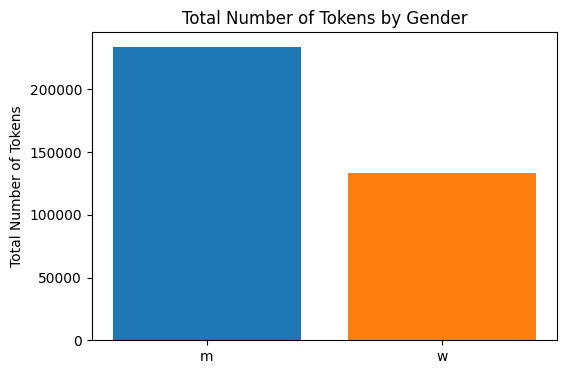

In [12]:
# Calculate the total number of tokens for each gender
total_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens'].sum()
total_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens'].sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total number of tokens
ax.bar(['m', 'w'], [total_tokens_m, total_tokens_w], color=['tab:blue', 'tab:orange'])

# Set y-axis label and title
ax.set_ylabel('Total Number of Tokens')
ax.set_title('Total Number of Tokens by Gender')

# Show the plot
plt.show()

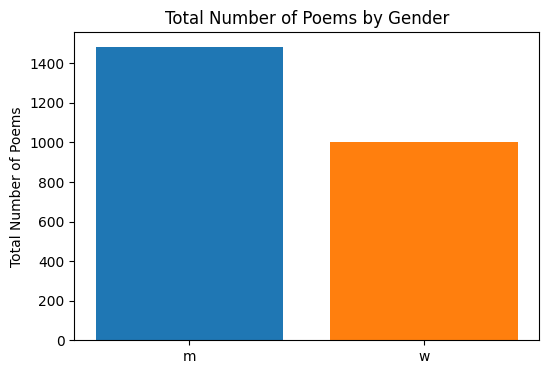

In [13]:
# Calculate the total number of tokens for each gender
total_tokens_m = df[df['gender'] == 'm'].shape[0]
total_tokens_w = df[df['gender'] == 'w'].shape[0]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the total number of tokens
ax.bar(['m', 'w'], [total_tokens_m, total_tokens_w], color=['tab:blue', 'tab:orange'])

# Set y-axis label and title
ax.set_ylabel('Total Number of Poems')
ax.set_title('Total Number of Poems by Gender')

# Show the plot
plt.show()

c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


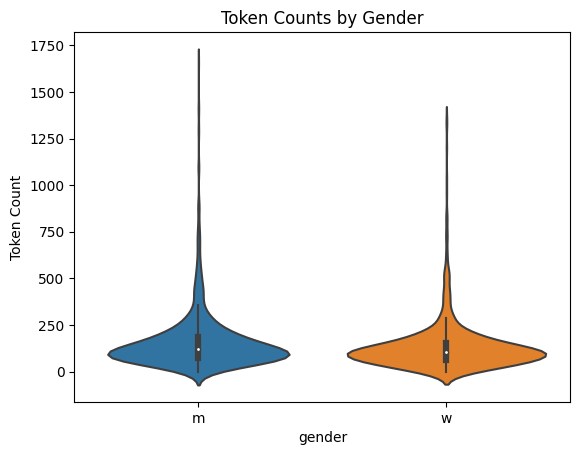

In [14]:
# Create a boxplot of token counts by gender
sns.violinplot(x='gender', y='num_tokens', data=df)

# Set y-axis label and title
plt.ylabel('Token Count')
plt.title('Token Counts by Gender')

# Show the plot
plt.show()


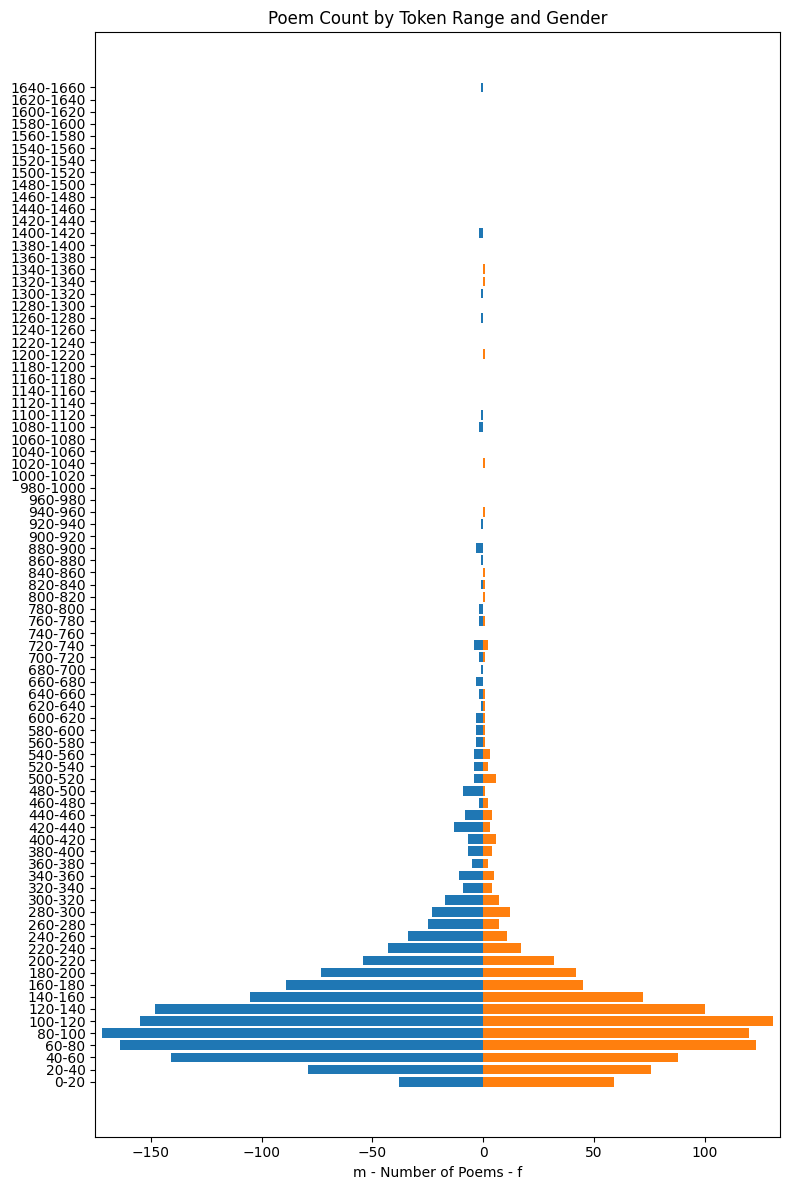

In [15]:
# Define the token range intervals
num_tokens_m = df.loc[df['gender'] == 'm', 'num_tokens']
num_tokens_w = df.loc[df['gender'] == 'w', 'num_tokens']
token_intervals = np.arange(0, max(max(num_tokens_m), max(num_tokens_w))+20, 20)

# Group the indices based on token ranges
indices_m_grouped = [np.where((num_tokens_m >= token_intervals[i]) & (num_tokens_m < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]
indices_w_grouped = [np.where((num_tokens_w >= token_intervals[i]) & (num_tokens_w < token_intervals[i+1]))[0] for i in range(len(token_intervals) - 1)]

# Count the number of poems in each token range
counts_m = [len(indices) for indices in indices_m_grouped]
counts_w = [len(indices) for indices in indices_w_grouped]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 12))

# Plot the number of poems for 'm' on the left side
ax.barh(range(len(counts_m)), -np.array(counts_m), color='tab:blue', align='center')

# Plot the number of poems for 'w' on the right side
ax.barh(range(len(counts_w)), np.array(counts_w), color='tab:orange', align='center')

# Set y-axis tick positions and labels
yticks = range(len(token_intervals) - 1)
yticklabels = [f"{token_intervals[i]}-{token_intervals[i+1]}" for i in range(len(token_intervals) - 1)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Set x-axis label and title
ax.set_xlabel('m - Number of Poems - f')
ax.set_title('Poem Count by Token Range and Gender')

# Set the x-axis limits based on the maximum number of poems
ax.set_xlim(-max(counts_m) - 3, max(counts_w) + 3)
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cravi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is d

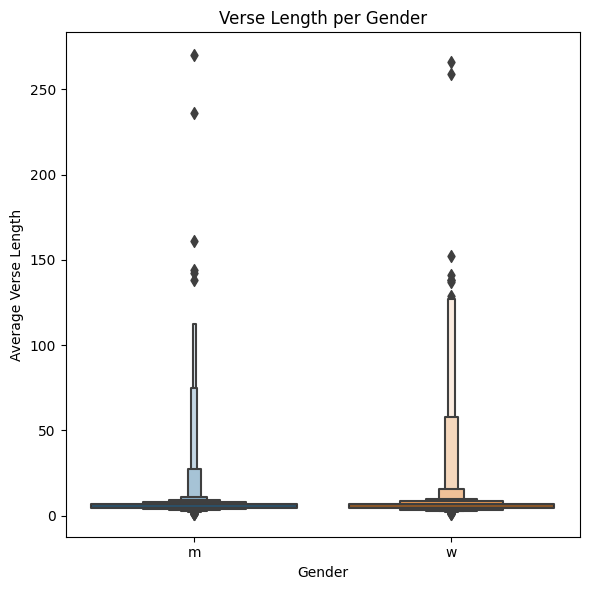

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

# Plot verse length per gender
sns.boxenplot(x='gender', y='avg_verse_length', data=df, ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Verse Length')
ax.set_title('Verse Length per Gender')

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
from collections import Counter
from operator import itemgetter

stopwords = ['!', '?', ':', ',', '.', ';', 'der', 'die', 'das', 'den', 'in', 'und', 'ist', 'ein', 'mit', 'zu', 'nicht', 'wie', 'von', 'auf', 'im']

def get_most_common_words(df, gender=None, num_words=10):
    # If a specific gender is specified, filter the dataframe
    if gender:
        df = df[df['gender'] == gender]
    
    # Concatenate all tokens from all poems into a single list
    all_tokens = [token for poem in df['tokenized_poem'] for token in poem if token not in stopwords]

    # Count the occurrences of each word
    counter = Counter(all_tokens)

    # Get the most common words
    most_common_words = counter.most_common(num_words)

    return most_common_words

# Overall
most_common_overall = get_most_common_words(df)

# Male
most_common_male = get_most_common_words(df, gender='m')

# Female
most_common_female = get_most_common_words(df, gender='w')

print("Most common words overall: ", most_common_overall)
print("Most common words for male authors: ", most_common_male)
print("Most common words for female authors: ", most_common_female)

Most common words overall:  [('ich', 3597), ('es', 2561), ('sich', 2451), ('sie', 2339), ('dem', 1983), ('aus', 1843), ('du', 1753), ('an', 1668), ('wir', 1643), ('als', 1324)]
Most common words for male authors:  [('ich', 2196), ('es', 1691), ('sich', 1530), ('sie', 1431), ('dem', 1275), ('aus', 1103), ('an', 1067), ('du', 1026), ('wir', 1005), ('so', 826)]
Most common words for female authors:  [('ich', 1401), ('sich', 921), ('sie', 908), ('es', 870), ('aus', 740), ('du', 727), ('dem', 708), ('wir', 638), ('an', 601), ('als', 522)]


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,title,gender,author,poem,line_data,tokenized_poem,num_tokens,avg_verse_length
0,00-hera-mit-den-weissen-armen-kauft-am-flohmar...,m,Stefan Schmitzer,kleinfamilien überall kleinfamilien ihr selbst...,"[kleinfamilien, überall kleinfamilien, ihr sel...","[kleinfamilien, überall, kleinfamilien, ihr, s...",137,4.419
1,12-ein-zahlengedicht-826,m,Gerhard Rühm,"bewegt und sehr rhythmisch 3, 4, 1 2 3 2 2 3 3...","[bewegt und sehr rhythmisch, 3, 4,, 1 2 3, 2 2...","[bewegt, und, sehr, rhythmisch, 3, ,, 4, ,, 1,...",371,3.408
2,125-episoden-imonki-16200,m,Alexandru Bulucz,125 Episoden Monk . In Worten: einhundertfünfu...,"[125 Episoden, Monk, . In Worten: einhundertfü...","[125, Episoden, Monk, ., In, Worten, :, einhun...",657,11.188
3,13-variationen-des-themas-baum-wind-ausschnitt...,m,Eugen Gomringer,,[],[],0,NaN
4,1886-53,m,Gottfried Benn,"Ostern am spätesten Termin, an der Elbe blühte...","[Ostern am spätesten Termin,, an der Elbe blüh...","[Ostern, am, spätesten, Termin, ,, an, der, El...",547,4.009
5,2-uhr-16-gedicht-5230,m,Franz Hodjak,"Hin und wieder knistert nachts ein Teufel, als...","[Hin und wieder, knistert nachts ein Teufel, a...","[Hin, und, wieder, knistert, nachts, ein, Teuf...",168,5.143
6,21-september-5717,w,Elfriede Czurda,gilt nicht die stille steht in der halle mitte...,"[gilt nicht die stille, steht in der halle mit...","[gilt, nicht, die, stille, steht, in, der, hal...",58,4.385
7,21-uhr-39-gedicht-5233,m,Franz Hodjak,"Wer eine Überraschung erwartet, muß schon unte...","[Wer eine Überraschung, erwartet, muß schon un...","[Wer, eine, Überraschung, erwartet, ,, muß, sc...",92,3.619
8,23-september-5718,w,Elfriede Czurda,keine zeile schreibt der schwarze himmel drück...,"[keine zeile schreibt der schwarze, himmel drü...","[keine, zeile, schreibt, der, schwarze, himmel...",68,5.154
9,3-artemis-16610,m,Stefan Schmitzer,knappediknappknapp knapp oberhalb der baumgren...,[knappediknappknapp knapp oberhalb der baumgre...,"[knappediknappknapp, knapp, oberhalb, der, bau...",418,6.931
